In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv
/kaggle/input/mercedes-benz-greener-manufacturing/test.csv
/kaggle/input/mercedes-benz-greener-manufacturing/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/train.csv')
test = pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/test.csv')
sub = pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv')

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [4]:
desc = train.describe()
train.shape

(4209, 378)

In [5]:
desc.head(10)

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cat_col =  list(set(train.columns) - set(desc.columns))

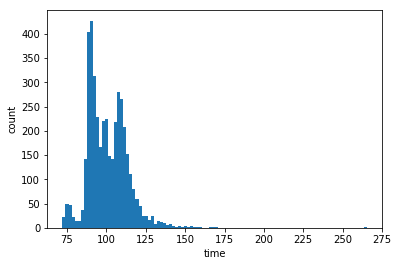

In [7]:
%matplotlib inline
plt.hist(train['y'], bins=100)
plt.xlabel('time')
plt.ylabel('count')
plt.show()

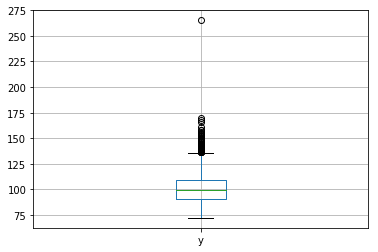

In [8]:
%matplotlib inline
bp1 = train.boxplot(column=['y'])

In [9]:
train[train['y']>150]['y'].sort_values()

253     150.43
1205    150.89
1269    152.32
2736    153.51
2240    154.16
1060    154.43
429     154.87
3744    155.62
2735    158.23
889     158.53
1203    160.87
3133    165.52
1459    167.45
342     169.91
883     265.32
Name: y, dtype: float64

In [10]:
drop_col = []
pick_col = []
for j in range(2,len(desc.columns)):
    if desc.iloc[2,j]==0:
        drop_col.append(desc.columns[j])
    elif desc.iloc[7,j]>1:
        print(desc.columns[j])
    else:
        pick_col.append(desc.columns[j])
train1 = train[train['y']<160]
train1_con =  train1[pick_col]
train1['ones'] = np.log(np.log(train1_con.sum(axis=1,skipna=True)))
len(pick_col)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


356

In [11]:
#y = np.log(train1['y']+1)
y = train1['y']

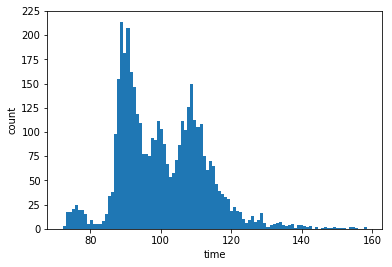

In [12]:

%matplotlib inline
plt.hist(y, bins=100)
plt.xlabel('time')
plt.ylabel('count')
plt.show()

In [13]:
X = pd.concat([train1[cat_col], train1[pick_col]], axis=1,sort=False)
X1 = pd.get_dummies(X, columns =cat_col)
X1.shape

(4204, 551)

In [14]:
from sklearn.decomposition import TruncatedSVD
n_comp =95
svd = TruncatedSVD(n_components=n_comp,n_iter = 50,random_state=0)
svd.fit(X1)
train_svd = svd.transform(X1)
print(sum(svd.explained_variance_ratio_))  

0.9011703823949099


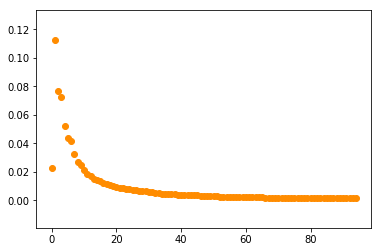

In [15]:
plt.figure()
plt.scatter(list(range(n_comp)),svd.explained_variance_ratio_, c="darkorange", label="data")

In [16]:
from sklearn.decomposition import SparsePCA
pca = SparsePCA(n_components=80,  normalize_components=True, random_state=0)
pca.fit(X1) 
train_pca = pca.transform(X1)
train_pca.shape

(4204, 80)

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree0 = DecisionTreeRegressor(max_depth=50) #最大深度為5的決策樹
tree0.fit(X1, y)

DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

<BarContainer object of 50 artists>

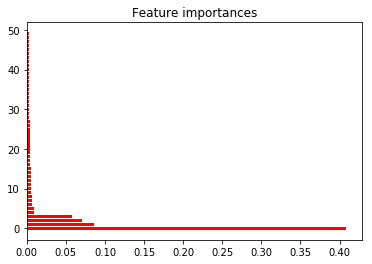

In [18]:
score = pd.DataFrame()
score['feature'] = X1.columns
score['importance'] = tree0.feature_importances_
score_sort = score.sort_values(by=['importance'], ascending=False)
plt.figure()
plt.title("Feature importances")
plt.barh(range(50), score_sort.iloc[0:50]['importance'],
       color="r", align="center")

In [19]:
score_sort.iloc[0:6]

,feature,importance
287,X314,0.407802
288,X315,0.085341
242,X263,0.070089
104,X119,0.057595
548,X6_j,0.009512
133,X150,0.008831


In [20]:
score_pick_col = list(score_sort.iloc[0:4]['feature'])
#score_pick_col+=cat_col
score_pick_col

['X314', 'X315', 'X263', 'X119']

In [21]:
X2 = pd.concat([train1['ones'].reset_index(drop=True), pd.DataFrame(train_pca) ], axis=1, sort=False)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X2)
X3 = scaler.transform(X2)
X4 = pd.concat([train1[score_pick_col].reset_index(drop=True), pd.DataFrame(X3) ], axis=1, sort=False)
X5 =X4
#X5 = pd.get_dummies(X4, columns =cat_col)
X5.shape

(4204, 85)

In [22]:
seed = 987
train_X, test_X, train_y, test_y = train_test_split(X5, y, test_size = 0.2, random_state= seed)

In [23]:
train_X.shape

(3363, 85)

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
#model = Ridge(alpha=0.001, fit_intercept=True)
model = LinearRegression(fit_intercept=True, normalize= False)
model.fit(train_X, train_y)
y_1 = model.predict(test_X)

In [25]:
print('test err',mean_squared_error(y_1, test_y), ' train err',mean_squared_error(model.predict(train_X), train_y))

test err 61.815492156995  train err 59.18170169106099


In [26]:
r2_score(test_y, y_1)

0.5928381622528176

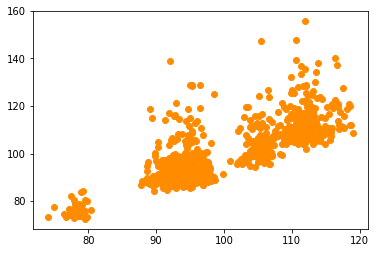

In [27]:
plt.figure()
plt.scatter(y_1,test_y, c="darkorange", label="data")

### Decission Tree Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [1000]
#n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [] #[int(x) for x in np.linspace(50, 100, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3,4, 5, 7]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [None], 'min_samples_split': [3, 5, 7], 'min_samples_leaf': [3, 4, 5, 7], 'bootstrap': [True, False]}


In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
do = False
if do:
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(train_X, train_y)

In [31]:
if do:
    print(rf_random.best_estimator_)
    y_rf1 = rf_random.predict(test_X)
    print('test err',mean_squared_error(y_rf1, test_y), 
      '\ntrain err',mean_squared_error(rf_random.predict(train_X), train_y),
     '\nr2score',r2_score(test_y, y_rf1) )

In [32]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
# Train the model on training data
rf.fit(train_X, train_y);

In [33]:
# Use the forest's predict method on the test data
y_2 = rf.predict(test_X)
print('test err',mean_squared_error(y_2, test_y), 
      '\ntrain err',mean_squared_error(rf.predict(train_X), train_y),
     '\nr2score',r2_score(test_y, y_2) )


test err 63.33387995824504 
train err 37.486741704106606 
r2score 0.5828369546914554


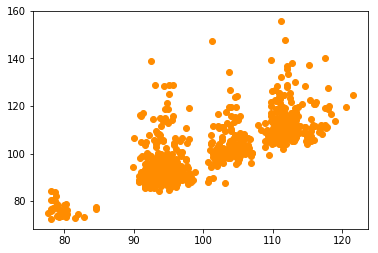

In [34]:
plt.figure()
plt.scatter(y_2,test_y, c="darkorange", label="data")

##  MLP

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [36]:
train_X.shape

(3363, 85)

In [37]:
def nnmodel(lr_rate):
    net1 = Sequential()
    net1.add(Dense(64, input_dim=train_X.shape[1], activation='relu'))
    net1.add(Dropout(0.25))
    net1.add(Dense(32, activation='relu'))
    net1.add(Dropout(0.25))
    net1.add(Dense(1, activation='linear'))
    opt = optimizers.Adam(lr=lr_rate, decay=0.000001)

    #opt = optimizers.RMSprop(lr=lr_rate, rho=0.9, epsilon=None, decay=0.00001)
    # = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.000001, amsgrad=False)
    net1.compile(loss='mean_squared_error', optimizer= opt)
    return net1
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor='val_loss')]

In [38]:
do = False
mse = []
lr = [ 0.01, 0.0075, 0.005]
if do ==True:
    for j in lr:
        np.random.seed(seed)
        net1 = nnmodel(j)
        net1.fit(train_X, train_y,epochs=50, batch_size=10,  # Number of observations per batch
                      validation_data=(test_X, test_y)) # Data for evaluation
        y_3 = net1.predict(test_X)
        mse.append(mean_squared_error(y_3, test_y))
mse

[]

In [39]:
np.random.seed(seed)
if do:
    net1 = nnmodel(lr[np.argmin(mse)])
else:
    net1 = nnmodel(0.009)
net1.fit(train_X, train_y,epochs=200, batch_size=10,  # Number of observations per batch
                      validation_data=(test_X, test_y)) # Data for evaluation


Train on 3363 samples, validate on 841 samples
Epoch 1/200
3363/3363 [==============================] - 1s 380us/step - loss: 1043.7587 - val_loss: 183.4402
Epoch 2/200
3363/3363 [==============================] - 1s 198us/step - loss: 439.9867 - val_loss: 162.4167
Epoch 3/200
3363/3363 [==============================] - 1s 178us/step - loss: 423.6007 - val_loss: 156.3898
Epoch 4/200
3363/3363 [==============================] - 1s 186us/step - loss: 414.2856 - val_loss: 135.1524
Epoch 5/200
3363/3363 [==============================] - 1s 150us/step - loss: 381.6761 - val_loss: 116.2350
Epoch 6/200
3363/3363 [==============================] - 1s 156us/step - loss: 350.3854 - val_loss: 94.9642
Epoch 7/200
3363/3363 [==============================] - 1s 153us/step - loss: 359.0526 - val_loss: 154.5238
Epoch 8/200
3363/3363 [==============================] - 0s 148us/step - loss: 333.6755 - val_loss: 114.7486
Epoch 9/200
3363/3363 [==============================] - 1s 149us/step - loss: 31

In [40]:
y_3 = net1.predict(test_X)
print('test err',mean_squared_error(y_3, test_y), ' train err',mean_squared_error(net1.predict(train_X), train_y))

test err 85.17655004649737  train err 25.720424403731784


In [41]:
r2_score(test_y, y_3) 

0.43896522635754376

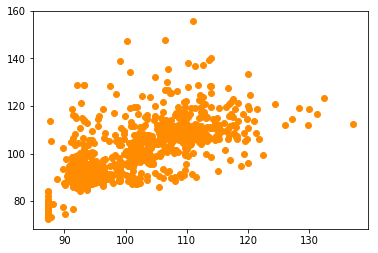

In [42]:
plt.figure()
plt.scatter(y_3,test_y, c="darkorange", label="data")

### xgboost

In [43]:
import xgboost as xgb
param = {'max_depth':15, 'eta':10**-1, 'silent':1, 'min_child_weight':3, 'subsample' : 0.75 ,"early_stopping_rounds":10,
          "objective"   : "count:poisson",'eval_metric': 'rmse','colsample_bytree':0.65}
num_round=1000
dtrain=xgb.DMatrix(train_X,label=train_y)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [44]:
dtest=xgb.DMatrix(test_X)

watchlist  = [(dtrain,'train')]

bst = xgb.train(param, dtrain, num_round, watchlist)

print("Training the model")
y_test_bst=bst.predict(dtest)

[0]	train-rmse:100.73
[1]	train-rmse:100.691
[2]	train-rmse:100.65
[3]	train-rmse:100.606
[4]	train-rmse:100.558
[5]	train-rmse:100.507
[6]	train-rmse:100.452
[7]	train-rmse:100.393
[8]	train-rmse:100.33
[9]	train-rmse:100.263
[10]	train-rmse:100.19
[11]	train-rmse:100.113
[12]	train-rmse:100.029
[13]	train-rmse:99.94
[14]	train-rmse:99.8441
[15]	train-rmse:99.7413
[16]	train-rmse:99.631
[17]	train-rmse:99.5128
[18]	train-rmse:99.3859
[19]	train-rmse:99.2499
[20]	train-rmse:99.104
[21]	train-rmse:98.9475
[22]	train-rmse:98.7798
[23]	train-rmse:98.5998
[24]	train-rmse:98.4068
[25]	train-rmse:98.1997
[26]	train-rmse:97.9777
[27]	train-rmse:97.7397
[28]	train-rmse:97.4843
[29]	train-rmse:97.2104
[30]	train-rmse:96.9168
[31]	train-rmse:96.6018
[32]	train-rmse:96.264
[33]	train-rmse:95.9018
[34]	train-rmse:95.5133
[35]	train-rmse:95.0966
[36]	train-rmse:94.6498
[37]	train-rmse:94.1706
[38]	train-rmse:93.6567
[39]	train-rmse:93.1057
[40]	train-rmse:92.5147
[41]	train-rmse:91.881
[42]	train-r

In [45]:
print('test err:',mean_squared_error(y_test_bst, test_y), 
      '\ntrain err:',mean_squared_error(bst.predict(dtrain), train_y),
    '\nr-square', r2_score(test_y,y_test_bst) )

test err: 79.45143497449291 
train err: 5.048837592397659 
r-square 0.4766750025429566


In [46]:
y_mean = round(y.mean(),3)

In [47]:
import xgboost as xgb

# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}

# form DMatrices for Xgboost training
#dtrain = xgb.DMatrix(train.drop('y', axis=1), y_train)
#dtest = xgb.DMatrix(test)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=800, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

[0]	train-rmse:12.2106	test-rmse:12.2124
[50]	train-rmse:10.6039	test-rmse:10.6972
[100]	train-rmse:9.47446	test-rmse:9.66495
[150]	train-rmse:8.69391	test-rmse:8.98121
[200]	train-rmse:8.16085	test-rmse:8.54515
[250]	train-rmse:7.79448	test-rmse:8.27325
[300]	train-rmse:7.5393	test-rmse:8.10529
[350]	train-rmse:7.34798	test-rmse:8.00485
[400]	train-rmse:7.18537	test-rmse:7.94638
[450]	train-rmse:7.05088	test-rmse:7.91158
[500]	train-rmse:6.94182	test-rmse:7.89257
[550]	train-rmse:6.84712	test-rmse:7.88603
[600]	train-rmse:6.76392	test-rmse:7.88545
[650]	train-rmse:6.68772	test-rmse:7.88447
[700]	train-rmse:6.61722	test-rmse:7.88751
656


In [48]:
bst2 = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
y_pred = bst2.predict(dtest)
print('test err:',mean_squared_error(y_pred, test_y), 
      '\ntrain err:',mean_squared_error(bst2.predict(dtrain), train_y),
    '\nr-square', r2_score(test_y,y_pred) )

[01:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
test err: 61.44187656518276 
train err: 48.91347030006989 
r-square 0.5952990665611895


In [49]:
test_con =  test[pick_col]
test['ones'] = np.log(np.log(test_con.sum(axis=1,skipna=True)))
out_X = pd.concat([test[cat_col], test[pick_col]], axis=1,sort=False)
out_X1 = pd.get_dummies(out_X, columns =cat_col)

keep = []
add = []
for j in out_X1.columns:
    if j in (X1.columns):
        keep.append(j)
out_X2 = out_X1[keep]
for k in X1.columns:
    if k not in out_X2.columns:
        add.append(k)
        out_X2[k]=0
out_X2.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(4209, 551)

In [50]:
test_pca =pca.transform(out_X2)
#test_svd = svd.transform(out_X2)
out_X3 = pd.concat([test['ones'].reset_index(drop=True), pd.DataFrame(test_pca) ], axis=1, sort=False)
out_X4 = scaler.transform(out_X3)
out_X5 = pd.concat([test[score_pick_col].reset_index(drop=True), pd.DataFrame(out_X4) ], axis=1, sort=False)
#out_X5 = out_X4
out_X5.shape

#out_X1 = scaler.transform(out_X)
#out_X2 = pd.concat([test[score_pick_col].reset_index(drop=True), pd.DataFrame(out_X1) ], axis=1, sort=False)
#out_X3 = pd.get_dummies(out_X2, columns =cat_col)

(4209, 85)

In [51]:
out_y1 = model.predict(out_X5)
out_y2 = rf.predict(out_X5)
out_y3 = net1.predict(out_X5)

dtest2=xgb.DMatrix(out_X5)
out_y4 = bst.predict(dtest2)
out_y5 = bst2.predict(dtest2)

In [52]:
print( out_y1.mean(),  out_y2.mean(), out_y3.mean(), out_y4.mean(),  out_y5.mean())

99.01771531651363 100.65268920992035 100.53705 102.19644 101.03239


In [53]:
test['y'] = out_y1
test['y2'] = out_y2
test['y3'] =out_y3
test['y4'] = out_y4
test['y5'] = out_y5
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X382,X383,X384,X385,ones,y,y2,y3,y4,y5
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,0,1.383537,76.842369,84.342486,87.384956,77.205513,80.703873
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,0,0,1.436201,93.186128,96.451432,92.508659,94.804642,94.040359
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,0,1.397000,74.762297,84.541889,87.384956,77.855728,80.352882
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,0,1.401292,76.724454,83.805420,87.384956,76.813736,80.536514
4,5,w,s,as,c,d,y,i,m,0,...,0,0,0,0,1.428968,109.773222,110.684462,115.521774,113.649101,113.158585


In [54]:
output = pd.concat([test['ID'], test['y']], axis=1, sort=False)
output.shape

(4209, 2)

In [55]:
output2 = pd.concat([test['ID'], test['y2']], axis=1, sort=False)
output2.columns = ['ID', 'y']

output3 = pd.concat([test['ID'], test['y3']], axis=1, sort=False)
output3.columns = ['ID', 'y']

output4 = pd.concat([test['ID'], test['y4']], axis=1, sort=False)
output4.columns = ['ID', 'y']

output5 = pd.concat([test['ID'], test['y5']], axis=1, sort=False)
output5.columns = ['ID', 'y']

In [56]:
output.to_csv("output0822_1.csv", index=False)
output2.to_csv("output0822_2.csv", index=False)
output3.to_csv("output0822_3.csv", index=False)
output4.to_csv("output0822_4.csv", index=False)
output5.to_csv("output0822_5.csv", index=False)